In [ ]:
%load_ext autoreload
%autoreload 2
from ipynb_path import *

In [ ]:
from cfnet.import_essentials import *

## Covarent Shift

p_train(x) != p_test(x)

p_train(y|x) = p_test(y|x)

In [ ]:
size = 1000
x1 = np.random.normal(0.5, 0.5, (size, 1))
x2 = np.random.normal(0., 0.3, (size, 1))
y = -x2 + x1 ** 3 + np.random.normal(-0.1, 0.1, (size, 1))
y_label = np.array(y > 0, dtype=float)

In [ ]:
def covarent_shift(mu_1, sig_1, mu_2, sig_2, size=1000):
    x1 = np.random.normal(mu_1, sig_1, (size, 1))
    x2 = np.random.normal(mu_2, sig_2, (size, 1))
    y = -x2 + x1 ** 3 + np.random.normal(-0.1, 0.1, (size, 1))
    y_label = np.array(y > 0, dtype=float)
    return x1, x2, y_label

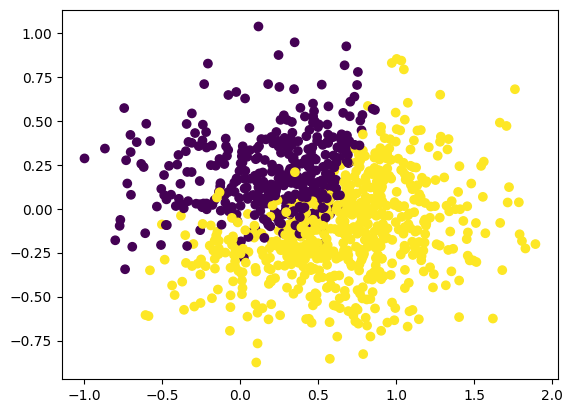

In [ ]:
x1, x2, y = covarent_shift(0.5, 0.5, 0., 0.3)
plt.scatter(x1, x2, c=y)

pd.DataFrame.from_dict({
    'x1': x1.reshape(-1), 'x2': x2.reshape(-1), 'y': y.reshape(-1)
}).to_csv('assets/data/covarient/org.csv', index=None)

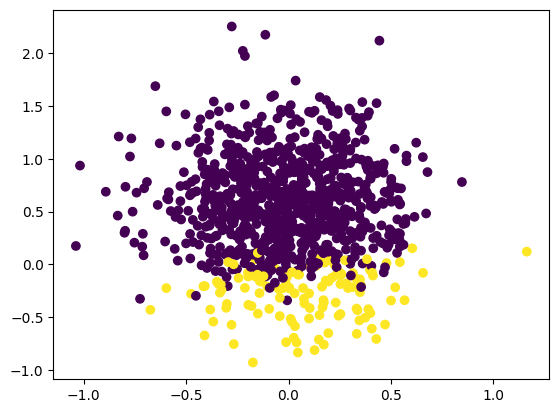

In [ ]:
x1, x2, y = covarent_shift(0., 0.3, 0.5, 0.5)
plt.scatter(x1, x2, c=y)

pd.DataFrame.from_dict({
    'x1': x1.reshape(-1), 'x2': x2.reshape(-1), 'y': y.reshape(-1)
}).to_csv('assets/data/covarient/upt.csv', index=None)

## Label Shift

p_train(y) != p_test(y)

p_train(x|y) = p_test(x|y)

In [ ]:
def label_shift(y):
    size = len(y)
    z = 2 * y - 1 + np.random.normal(0.1, 0.1, (size, 1))

    x1 = - z + z ** 3 + np.random.normal(0., 0.3, (size, 1)) 
    x2 = z + z ** 3 - 3 * y + np.random.normal(0., 0.3, (size, 1))
    return x1, x2


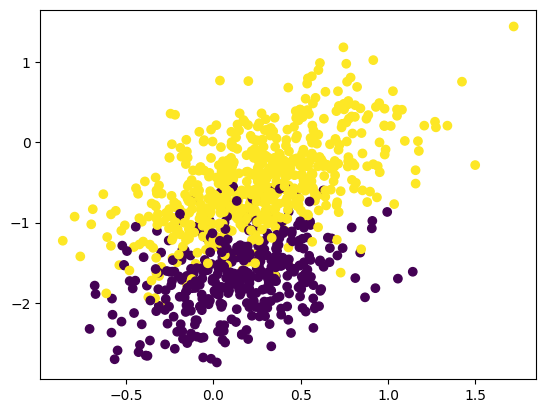

In [ ]:
size = 1000
y = np.random.binomial(1, p=0.6, size=(size, 1))
x1, x2 = label_shift(y)
plt.scatter(x1, x2, c=y)

pd.DataFrame.from_dict({
    'x1': x1.reshape(-1), 'x2': x2.reshape(-1), 'y': y.reshape(-1)
}).to_csv('assets/data/label/org.csv', index=None)

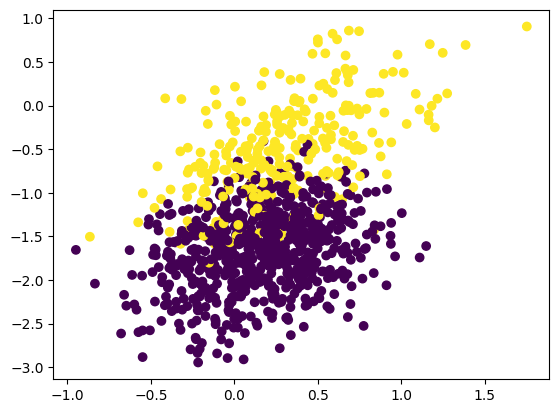

In [ ]:
size = 1000
y = np.random.binomial(1, p=0.3, size=(size, 1))
x1, x2 = label_shift(y)
plt.scatter(x1, x2, c=y)
pd.DataFrame.from_dict({
    'x1': x1.reshape(-1), 'x2': x2.reshape(-1), 'y': y.reshape(-1)
}).to_csv('assets/data/label/upt.csv', index=None)